In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv(r'E:\Data Science\Projects\ML\kobe-bryant-shot-selection\data\data.csv')

In [3]:
data.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [4]:
sample_submission = pd.read_csv(r'E:\Data Science\Projects\ML\kobe-bryant-shot-selection\data\sample_submission.csv')

In [5]:
sample_submission.head()

,shot_id,shot_made_flag
0,1,0.5
1,8,0.5
2,17,0.5
3,20,0.5
4,33,0.5


In [6]:
test = data[data['shot_made_flag'].isnull()]

In [7]:
train = data[data['shot_made_flag'].notnull()]

In [8]:
test.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
7,Jump Shot,Jump Shot,254,20000012,34.0163,1,28,-118.2688,8,3,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,8
16,Driving Layup Shot,Layup,100,20000019,34.0443,0,0,-118.2698,0,1,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-11-01,LAL vs. UTA,UTA,17
19,Driving Layup Shot,Layup,249,20000019,34.0443,0,0,-118.2698,10,3,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-11-01,LAL vs. UTA,UTA,20
32,Jump Shot,Jump Shot,4,20000047,33.9683,163,76,-118.1068,11,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-11-04,LAL @ VAN,VAN,33


In [9]:
train.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5
5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,6


In [10]:
col_wth_na = [col for col in test.columns if test[col].isnull().any()] 
max_na = pd.Series([test[i].isnull().sum() for i in col_wth_na], index = col_wth_na)
max_na.sort_values(ascending = False)

shot_made_flag    5000
dtype: int64

In [11]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [12]:
cols = ['opponent', 'season', 'action_type', 'combined_shot_type', 'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'team_name', 'matchup']
def encoding(df):
    for col in cols:
        df[col] = le.fit_transform(df[col])
    return(df)

In [13]:
encoding(train)

<ipython-input-12-7927596193ba>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])


,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
1,25,3,12,20000012,34.0443,-157,0,-118.4268,10,1,...,0,3,4,2,1610612747,0,2000-10-31,28,25,2
2,25,3,35,20000012,33.9093,-101,135,-118.3708,7,1,...,0,2,4,0,1610612747,0,2000-10-31,28,25,3
3,25,3,43,20000012,33.8693,138,175,-118.1318,6,1,...,0,4,4,0,1610612747,0,2000-10-31,28,25,4
4,4,1,155,20000012,34.0443,0,0,-118.2698,6,2,...,0,1,5,4,1610612747,0,2000-10-31,28,25,5
5,25,3,244,20000012,34.0553,-145,-11,-118.4148,9,3,...,0,3,4,2,1610612747,0,2000-10-31,28,25,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30691,11,4,382,49900088,34.0443,0,0,-118.2698,7,4,...,0,1,5,4,1610612747,0,2000-06-19,49,11,30692
30692,25,3,397,49900088,33.9963,1,48,-118.2688,6,4,...,0,1,2,4,1610612747,0,2000-06-19,49,11,30693
30694,40,3,426,49900088,33.8783,-134,166,-118.4038,3,4,...,0,2,4,0,1610612747,0,2000-06-19,49,11,30695
30695,25,3,448,49900088,33.7773,31,267,-118.2388,2,4,...,1,1,0,1,1610612747,0,2000-06-19,49,11,30696


In [14]:
encoding(test)

<ipython-input-12-7927596193ba>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])


,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,23,3,10,20000012,33.9723,167,72,-118.1028,10,1,...,0,5,4,0,1610612747,0,2000-10-31,28,25,1
7,23,3,254,20000012,34.0163,1,28,-118.2688,8,3,...,0,1,5,4,1610612747,0,2000-10-31,28,25,8
16,10,4,100,20000019,34.0443,0,0,-118.2698,0,1,...,0,1,5,4,1610612747,0,2000-11-01,71,30,17
19,10,4,249,20000019,34.0443,0,0,-118.2698,10,3,...,0,1,5,4,1610612747,0,2000-11-01,71,30,20
32,23,3,4,20000047,33.9683,163,76,-118.1068,11,1,...,0,5,4,0,1610612747,0,2000-11-04,35,31,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30668,23,3,386,49900087,33.8223,-23,222,-118.2928,7,4,...,0,1,4,0,1610612747,0,2000-06-16,12,11,30669
30680,43,5,213,49900088,34.0443,0,0,-118.2698,0,2,...,0,1,5,4,1610612747,0,2000-06-19,49,11,30681
30682,36,3,226,49900088,33.9963,-68,48,-118.3378,11,3,...,0,3,2,2,1610612747,0,2000-06-19,49,11,30683
30686,36,3,268,49900088,33.9513,16,93,-118.2538,5,3,...,0,1,2,2,1610612747,0,2000-06-19,49,11,30687


In [ ]:
#Start

In [15]:
X = train.drop(['shot_id', 'game_date', 'shot_made_flag'], axis = 1)
y = train['shot_made_flag']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0, test_size=0.3)

In [17]:
from sklearn.ensemble import RandomForestRegressor

In [46]:
regr_rf = RandomForestRegressor(random_state = 0, n_estimators = 32, n_jobs = 4, max_depth = 14, max_features = 0.3)
regr_rf.fit(X, y)

RandomForestRegressor(max_depth=14, max_features=0.3, n_estimators=32, n_jobs=4,
                      random_state=0)

In [47]:
result = regr_rf.predict(test.drop(['shot_id', 'game_date', 'shot_made_flag'], axis = 1))

In [48]:
sample_submission['shot_made_flag'] = result

In [49]:
sample_submission.to_csv("sub_01.csv", index = 0)

In [ ]:
#End

In [44]:
regr_rf = RandomForestRegressor(random_state = 0, n_estimators = 32, n_jobs = 4, max_depth = 14, max_features = 0.3)
regr_rf.fit(X_train, y_train)
result = regr_rf.predict(X_test)

In [45]:
from sklearn.metrics import log_loss
log_loss(y_test, result)

0.619131895154541

In [24]:
# 0.6072

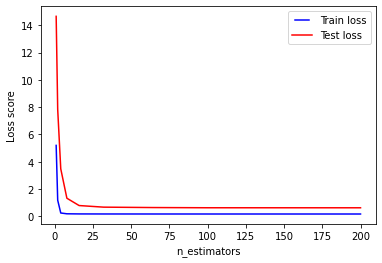

In [25]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []

for estimator in n_estimators:
   rf = RandomForestRegressor(n_estimators = estimator, n_jobs = 4)
   rf.fit(X_train, y_train)
    
   train_pred = rf.predict(X_train)
   train_results.append(log_loss(y_train, train_pred))
    
   y_pred = rf.predict(X_test)
   test_results.append(log_loss(y_test, y_pred))
    
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(n_estimators, train_results, color = 'blue', label = 'Train loss')
line2, = plt.plot(n_estimators, test_results, color = 'red', label = 'Test loss')
plt.legend(handler_map = {line1: HandlerLine2D(numpoints = 2)})
plt.ylabel('Loss score')
plt.xlabel('n_estimators')
plt.show()

In [26]:
# 32

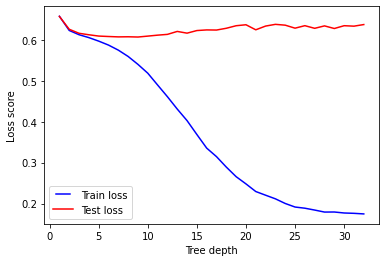

In [31]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []

for max_depth in max_depths:
   rf = RandomForestRegressor(max_depth = max_depth, n_jobs = 4)
   rf.fit(X_train, y_train)
    
   train_pred = rf.predict(X_train)
   train_results.append(log_loss(y_train, train_pred))
    
   y_pred = rf.predict(X_test)
   test_results.append(log_loss(y_test, y_pred))
    
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(max_depths, train_results, 'b', label = 'Train loss')
line2, = plt.plot(max_depths, test_results, 'r', label = 'Test loss')
plt.legend(handler_map = {line1: HandlerLine2D(numpoints = 2)})
plt.ylabel('Loss score')
plt.xlabel('Tree depth')
plt.show()

In [ ]:
#14

In [50]:
from xgboost import XGBRegressor

In [56]:
model = XGBRegressor(n_estimators = 500, learning_rate = 0.05, n_jobs = 4)
model.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [57]:
predictions = model.predict(test.drop(['shot_id', 'game_date', 'shot_made_flag'], axis = 1))

In [58]:
sample_submission['shot_made_flag'] = predictions

In [59]:
sample_submission.to_csv("sub_01.csv", index = 0)